In [2]:
import pandas as pd
import matplotlib.pyplot
import numpy as np

# Create annual energy usage data in Texas

In [3]:
HouseholdID = np.load('./PreprocessedData/hourly_data_PSTexas_HouseholdID.npy')

In [5]:
#Select households in Austin,Texas by dataID 
sql_data = pd.read_csv('data2015-2016.csv', na_values=[]) #import data downloaded from dataport sql
sql_data = sql_data.rename(columns=lambda x: x.replace('\t', ''))
sql_data.replace('\n','')
Texas_data = sql_data[sql_data['dataid'].isin(HouseholdID)] # select the data in Austin,Texas
Texas_data.tail() 
Texas_data.fillna(0,inplace=True)

E:\Ana\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [6]:
#Create Annual energy usage data in Texas by Pecan street data
annual_data_PSTexas = Texas_data[['dataid']] #the summarized data from Texas
annual_data_PSTexas['Total_use'] = Texas_data['use']
annual_data_PSTexas['Space_heat'] = Texas_data['heater1']
annual_data_PSTexas['Cooling'] = Texas_data['airwindowunit1'] + Texas_data['air1'] + Texas_data['air2'] + Texas_data['air3']
annual_data_PSTexas['Water_heat'] = Texas_data['waterheater1'] + Texas_data['waterheater2']
annual_data_PSTexas['Refrigerator'] = Texas_data['refrigerator1'] + Texas_data['refrigerator2']
annual_data_PSTexas['Freezer'] = Texas_data['freezer1']
annual_data_PSTexas['Oven'] = Texas_data['range1'] + Texas_data['oven1'] + Texas_data['oven2']
annual_data_PSTexas['Microwave'] = Texas_data['microwave1']
annual_data_PSTexas['Clotheswasher'] = Texas_data['clotheswasher1']
annual_data_PSTexas['Clothesdryer'] = Texas_data['clotheswasher_dryg1']
annual_data_PSTexas['Dishwasher'] = Texas_data['dishwasher1']
annual_data_PSTexas['Furnace'] = Texas_data['furnace1']
annual_data_PSTexas['Pool_pump'] = Texas_data['poolpump1']
annual_data_PSTexas['Hot_tub_pumb'] = Texas_data['jacuzzi1'] + Texas_data['pump1']
annual_data_PSTexas['Light&fan'] = Texas_data['bathroom1'] + Texas_data['bathroom2']+ Texas_data['bedroom1']+ Texas_data['bedroom2']+ Texas_data['bedroom3']+ Texas_data['bedroom4']+ Texas_data['bedroom5']+ Texas_data['diningroom1']+ Texas_data['diningroom2']+ Texas_data['garage1']+ Texas_data['garage2']+ Texas_data['kitchen1']+ Texas_data['kitchen2']+ Texas_data['lights_plugs1']+ Texas_data['lights_plugs2']+ Texas_data['lights_plugs3']+ Texas_data['lights_plugs4']+ Texas_data['lights_plugs5']+ Texas_data['lights_plugs6']+ Texas_data['livingroom1']+ Texas_data['livingroom2']+ Texas_data['office1']+ Texas_data['outsidelights_plugs1']+ Texas_data['outsidelights_plugs2']+ Texas_data['poollight1']+ Texas_data['housefan1']
annual_data_PSTexas.rename(columns={ annual_data_PSTexas.columns[0]: "HouseholdID" }, inplace=True)

E:\Ana\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Ana\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
E:\Ana\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [7]:
annual_data_PSTexas.head()

,HouseholdID,Total_use,Space_heat,Cooling,Water_heat,Refrigerator,Freezer,Oven,Microwave,Clotheswasher,Clothesdryer,Dishwasher,Furnace,Pool_pump,Hot_tub_pumb,Light&fan
1,4874,11161.378370,0.0,3675.881600,0.0,673.835404,0.0,0.000000,133.125430,73.744228,0.0,156.536933,2128.596482,0.00000,0.0,234.334517
5,7989,10346.337930,0.0,2981.406483,0.0,0.000000,0.0,0.000000,116.053249,0.000000,0.0,0.000000,440.645675,2078.48271,0.0,2154.891024
11,4193,13408.928480,0.0,3941.751283,0.0,0.000000,0.0,211.403833,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000
13,7680,11682.365270,0.0,3841.967333,0.0,0.000000,0.0,81.685700,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000
15,2510,7517.285386,0.0,2079.719104,0.0,1714.882519,0.0,159.908803,62.895400,60.390795,0.0,231.135267,1522.208131,0.00000,0.0,65.531084


# Create annual energy usage data in Pacific Region in U.S. by EIA data

In [8]:
recs2015 = pd.read_csv('recs2015.csv',na_values=[]) # annual data for other region from EIA
recsdata = recs2015.iloc[:,range(0,3)]
recs = recs2015.iloc[:,range(590,617)]
recs_data = recsdata.join(recs)
recs_data.head() 

,DOEID,REGIONC,DIVISION,KWH,KWHSPH,KWHCOL,KWHWTH,KWHRFG,KWHRFG1,KWHRFG2,...,KWHAHUHEAT,KWHAHUCOL,KWHEVAPCOL,KWHCFAN,KWHDHUM,KWHHUM,KWHPLPMP,KWHHTBPMP,KWHHTBHEAT,KWHNEC
0,10001,4,10,5270.742,0.000,1991.505,0.000,422.951,422.951,0.000,...,133.102,101.854,0.0,348.590,0.000,0.000,0.0,0.0,0.0,512.736
1,10002,3,7,12173.000,3390.979,2223.717,2089.679,752.709,752.709,0.000,...,0.000,0.000,0.0,418.690,0.000,44.696,0.0,0.0,0.0,934.599
2,10003,3,6,19655.394,3651.818,6837.336,0.000,1465.044,1093.210,371.834,...,200.526,264.038,0.0,1127.715,0.000,0.000,0.0,0.0,0.0,1041.363
3,10004,2,4,9852.535,1412.232,3534.948,0.000,639.980,436.886,203.094,...,499.514,196.457,0.0,912.032,0.000,0.000,0.0,0.0,0.0,558.375
4,10005,1,2,3115.655,0.000,332.701,0.000,311.469,270.185,41.284,...,104.540,15.978,0.0,99.024,156.175,0.000,0.0,0.0,0.0,753.726


In [9]:
annual_data_EIA = recs_data[['DOEID','REGIONC','DIVISION','KWH','KWHSPH','KWHCOL','KWHWTH','KWHRFG','KWHFRZ','KWHCOK','KWHMICRO','KWHCW','KWHCDR','KWHDWH','KWHAHUHEAT','KWHPLPMP','KWHHTBPMP']]
annual_data_EIA['KWHLAF'] = recs_data['KWHLGT'] + recs_data['KWHCFAN']
annual_data_EIA.columns=['HouseholdID', 'REGIONC', 'DIVISION', 'Total_use', 'Space_heat', 'Cooling', 'Water_heat',
       'Refrigerator', 'Freezer', 'Oven', 'Microwave', 'Clotheswasher',
       'Clothesdryer', 'Dishwasher', 'Furnace', 'Pool_pump', 'Hot_tub_pumb',
       'Light&fan']

E:\Ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
annual_data_EIA.head() #data of energy usage in other region

,HouseholdID,REGIONC,DIVISION,Total_use,Space_heat,Cooling,Water_heat,Refrigerator,Freezer,Oven,Microwave,Clotheswasher,Clothesdryer,Dishwasher,Furnace,Pool_pump,Hot_tub_pumb,Light&fan
0,10001,4,10,5270.742,0.000,1991.505,0.000,422.951,272.055,0.000,100.304,24.930,506.178,185.124,133.102,0.0,0.0,758.241
1,10002,3,7,12173.000,3390.979,2223.717,2089.679,752.709,270.167,295.082,197.841,0.000,0.000,0.000,0.000,0.0,0.0,1528.287
2,10003,3,6,19655.394,3651.818,6837.336,0.000,1465.044,0.000,1362.857,145.729,26.326,533.326,224.070,200.526,0.0,0.0,2045.106
3,10004,2,4,9852.535,1412.232,3534.948,0.000,639.980,483.588,112.720,0.000,38.956,498.861,0.000,499.514,0.0,0.0,1396.566
4,10005,1,2,3115.655,0.000,332.701,0.000,311.469,0.000,0.000,56.869,28.387,293.780,0.000,104.540,0.0,0.0,703.062


## Check the statistic description of each dataset

In [11]:
annual_data_PSTexas.describe()

,HouseholdID,Total_use,Space_heat,Cooling,Water_heat,Refrigerator,Freezer,Oven,Microwave,Clotheswasher,Clothesdryer,Dishwasher,Furnace,Pool_pump,Hot_tub_pumb,Light&fan
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,4951.386441,11573.783666,5.248217,3222.982650,92.701928,533.279931,12.075041,87.267573,45.046005,29.589626,7.736324,74.574073,880.086395,259.109431,42.192663,768.945208
std,2930.154557,6007.377700,87.956609,2118.857597,418.799967,548.550291,104.192617,127.907203,86.405827,71.781148,38.573156,100.068216,903.648910,1303.296534,285.111425,1267.468410
min,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2425.000000,7725.684489,0.000000,1912.645019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4767.000000,10346.563220,0.000000,3115.537233,0.000000,565.132264,0.000000,0.000000,4.478083,12.783333,0.000000,36.338600,771.338717,0.000000,0.000000,141.345900
75%,7729.000000,14061.229670,0.000000,4304.446884,0.000000,745.272301,0.000000,153.271867,61.970225,41.313467,0.000000,123.893742,1288.219189,0.000000,0.000000,1050.129689
max,9982.000000,51474.610590,1510.590073,13347.745171,4300.346309,3560.730250,1231.621447,625.820544,755.201617,997.596450,395.867752,635.137275,4489.519925,10872.972020,2692.181569,8080.041554


In [12]:
annual_data_EIA.describe()

,HouseholdID,REGIONC,DIVISION,Total_use,Space_heat,Cooling,Water_heat,Refrigerator,Freezer,Oven,Microwave,Clotheswasher,Clothesdryer,Dishwasher,Furnace,Pool_pump,Hot_tub_pumb,Light&fan
count,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.00000
mean,12843.500000,2.760816,5.670243,11028.934872,1626.674512,1857.768272,1482.290294,780.911898,182.157727,158.041657,119.000409,50.603635,511.645729,65.036594,179.784907,116.176969,17.117747,1346.72393
std,1641.551147,1.004187,2.842655,7049.727589,3050.157326,2236.829383,2093.684613,483.032946,308.268339,194.352075,105.981662,50.230245,623.344863,82.855038,271.874654,482.717779,83.493394,1328.07963
min,10001.000000,1.000000,1.000000,59.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.80500
25%,11422.250000,2.000000,3.000000,5926.525750,0.000000,376.347250,0.000000,479.363500,0.000000,0.000000,50.155000,16.179000,0.000000,0.000000,11.489750,0.000000,0.000000,495.77125
50%,12843.500000,3.000000,5.000000,9549.351000,0.000000,1093.570500,0.000000,663.414000,0.000000,113.952000,90.959000,39.290000,343.102000,37.482500,76.971500,0.000000,0.000000,965.25800
75%,14264.750000,4.000000,8.000000,14557.606750,1945.115750,2526.743750,2584.436750,966.423250,296.328750,240.797250,151.997750,67.490250,757.839500,99.203500,236.242250,0.000000,0.000000,1734.08175
max,15686.000000,4.000000,10.000000,63216.806000,35747.950000,20353.825000,14242.287000,5582.607000,2607.682000,2118.848000,1044.874000,540.641000,6117.413000,727.620000,4192.213000,5497.770000,853.196000,19093.06100


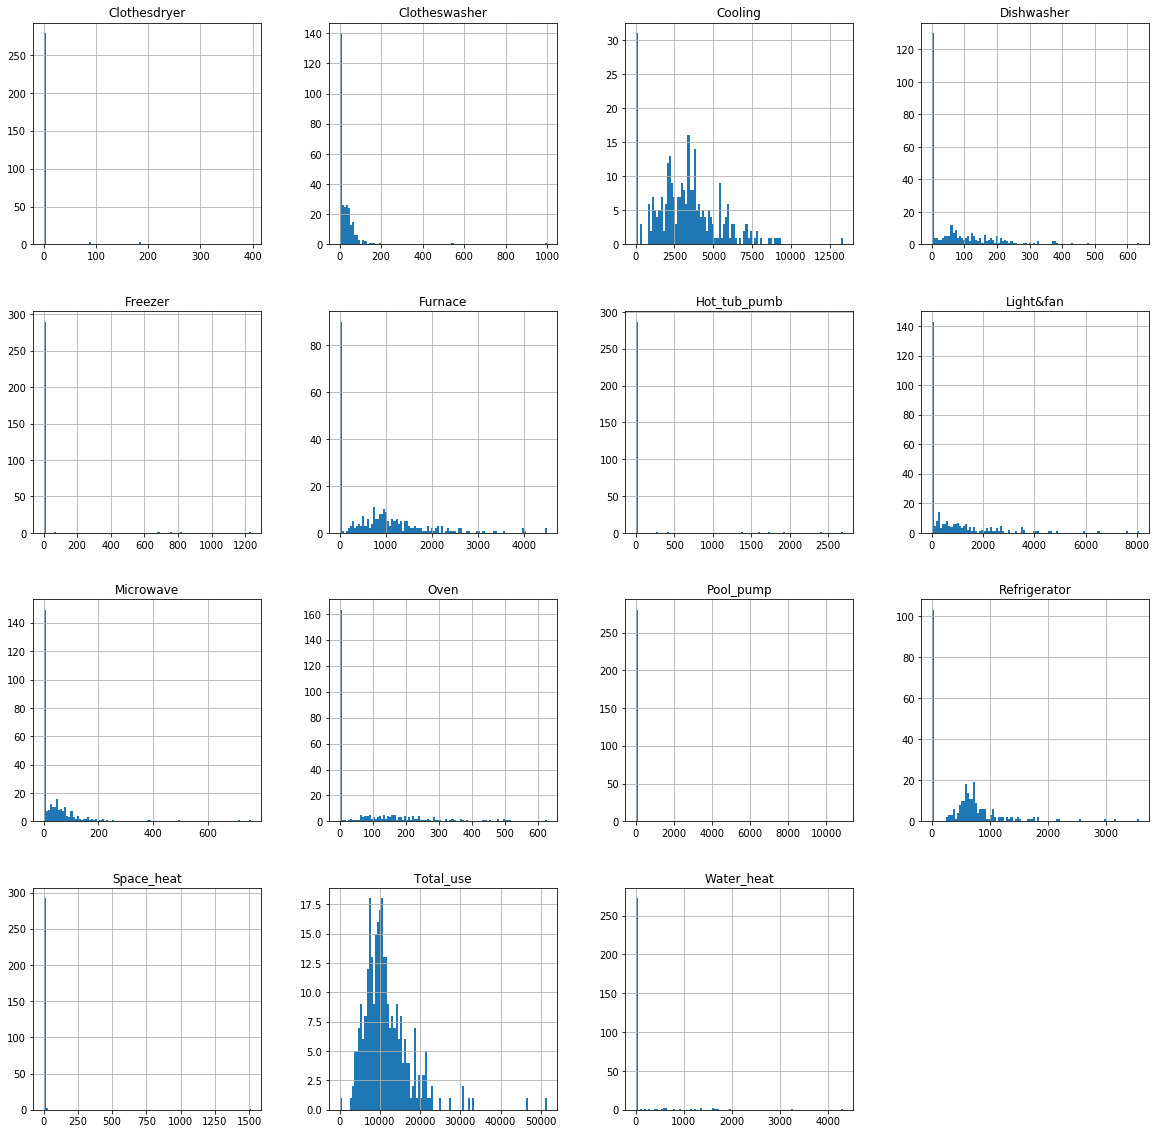

In [13]:
annual_data_PSTexas.drop('HouseholdID',axis=1).hist(bins=100,figsize=(20,20))
plt.show()

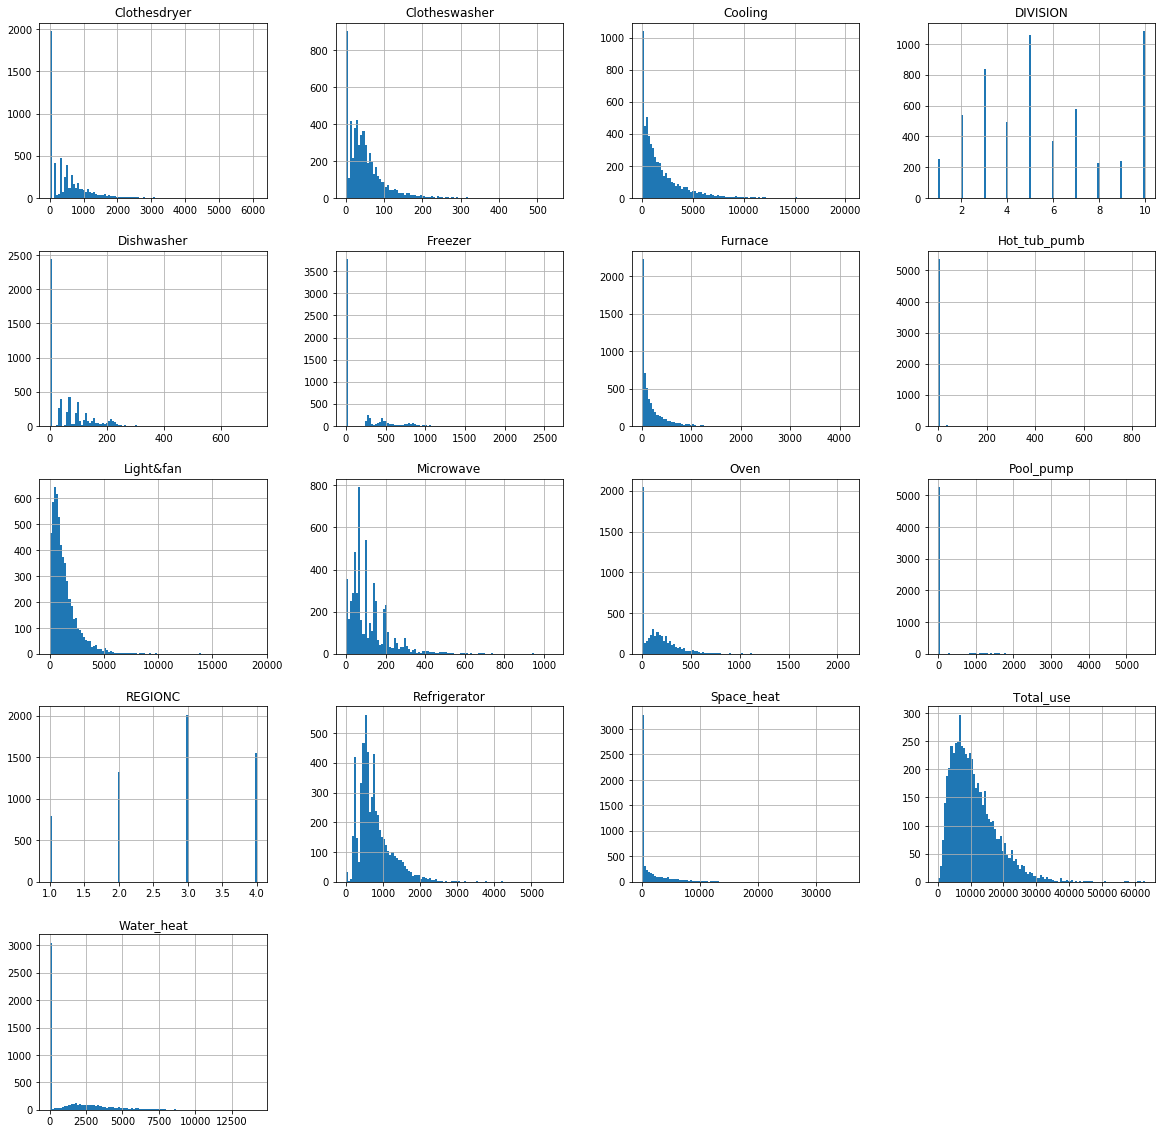

In [14]:
annual_data_EIA.drop('HouseholdID',axis=1).hist(bins=100,figsize=(20,20))
plt.show()

In [15]:
annual_data_PSTexas.to_pickle('./PreprocessedData/annual_data_PSTexas.pickle')

In [16]:
annual_data_EIA.loc[annual_data_EIA['DIVISION']==10].to_pickle('./PreprocessedData/annual_data_EIAPacific.pickle')